# RLab05 - Gabriele Bertinelli (2103359)

In [1]:
library(tidyverse)
library(gridExtra)
library(latex2exp)
library(emdbook)
library(bayestestR)
library(coda)
library(magrittr)
library(rjags)

set.seed(2103359)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Caricamento pacchetto: 'gridExtra'


Il seguente oggetto è mascherato da 'package:dplyr':

    combine



Caricamento pacchetto: 'magrittr'


Il seguente oggetto è mascherato da 'package:purrr':

    set_names


Il seguente oggetto è mascherato da 'package:tidyr':

    extract


Linked to JAGS 4.3.1

Loaded modules: basemod,bugs



#### 1)  
**1.1)**

In [31]:
# sets of observations
n1 <- c(rep(0, times=109), rep(1, times = 65), rep(2, times=22), rep(3, times=3), rep(4, times=1))
n2 <- c(rep(0, times=144), rep(1, times = 91), rep(2, times=32), rep(3, times=11), rep(4, times=2))

delta.t <- 0.001
lambda_list <- seq(from=0, to=7, by=delta.t)

#likelihood for the two observation is poisson
poisson <- function(ni, lambda_list){
                pi_like <- 1 #rep(1, times = length(lambda_list))
                for (n in ni){
                    pi_like <- pi_like * dpois(x=n, lambda=lambda_list)
                }
                return(pi_like)
            }

#compute the two likelihood separatly for the two observation
p1_like <- poisson(n1,  lambda_list)
p2_like <- poisson(n2,  lambda_list)

In [43]:
# posterior with uniform prior
p.post_star_unif1 <- p1_like * 1
p.post_unif1 <- p.post_star_unif1 / (sum(p.post_star_unif1)*delta.t)

my.median = function(mu, post, dt=0.001){
    for (i in seq(1, length(mu))){
        int  = sum(post[1:i]*dt)
        if (int>0.4999){med=mu[i]
                    break
        }
    }
    return(med)
}

mean_unif1 <- sum(p.post_unif1 * lambda_list)*delta.t
median_unif1 <- my.median(lambda_list, p.post_unif1)
variance_unif1 <- sum(((mean_unif1-lambda_list)^2)*p.post_unif1)*delta.t

lower_unif1 <- ncredint(lambda_list, p.post_unif1, level = 0.95)[['lower']]
upper_unif1 <- ncredint(lambda_list, p.post_unif1, level = 0.95)[['upper']]


p.post_star_unif2 <- p2_like * 1 
p.post_unif2 <- p.post_star_unif2 / (sum(p.post_star_unif2)*delta.t)

mean_unif2 <- sum(p.post_unif2 * lambda_list)*delta.t
median_unif2 <- my.median(lambda_list, p.post_unif2)
variance_unif2 <- sum(((mean_unif2-lambda_list)^2)*p.post_unif2)*delta.t

lower_unif2 <- ncredint(lambda_list, p.post_unif2, level = 0.95)[['lower']]
upper_unif2 <- ncredint(lambda_list, p.post_unif2, level = 0.95)[['upper']]


result_unif <- data.frame(
                mean = c(mean_unif1, mean_unif2), 
                median = c(median_unif1, median_unif2),
                variance = c(variance_unif1, variance_unif2),
                l.ci = c(lower_unif1, lower_unif2),
                u.ci = c(upper_unif1, upper_unif2),
                row.names = c('1st set', '2nd set')
                )

In [45]:
print(sprintf('Mean value Set 1: %.3f  -  Mean value Set 2: %.3f', result_unif$mean[1], result_unif$mean[2]))
print(sprintf('Median value Set 1: %.3f  -  Median value Set 2: %.3f', result_unif$median[1], result_unif$median[2]))
cat('\n')
print(sprintf('Variance Set 1: %.4f  -  Variance Set 2: %.4f', result_unif$variance[1], result_unif$variance[2]))
cat('\n')
print(sprintf('0.95 CI Set 1 [%.3f - %.3f]', result_unif$l.ci[1], result_unif$u.ci[1]))
print(sprintf('0.95 CI Set 2 [%.3f - %.3f]', result_unif$l.ci[2], result_unif$u.ci[2]))


[1] "Mean value Set 1: 0.615  -  Mean value Set 2: 0.704"
[1] "Median value Set 1: 0.613  -  Median value Set 2: 0.702"

[1] "Variance Set 1: 0.0031  -  Variance Set 2: 0.0025"

[1] "0.95 CI Set 1 [0.508 - 0.724]"
[1] "0.95 CI Set 2 [0.607 - 0.802]"


Warning message:
"Removed 6250 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 6250 rows containing missing values or values outside the scale range (`geom_line()`)."


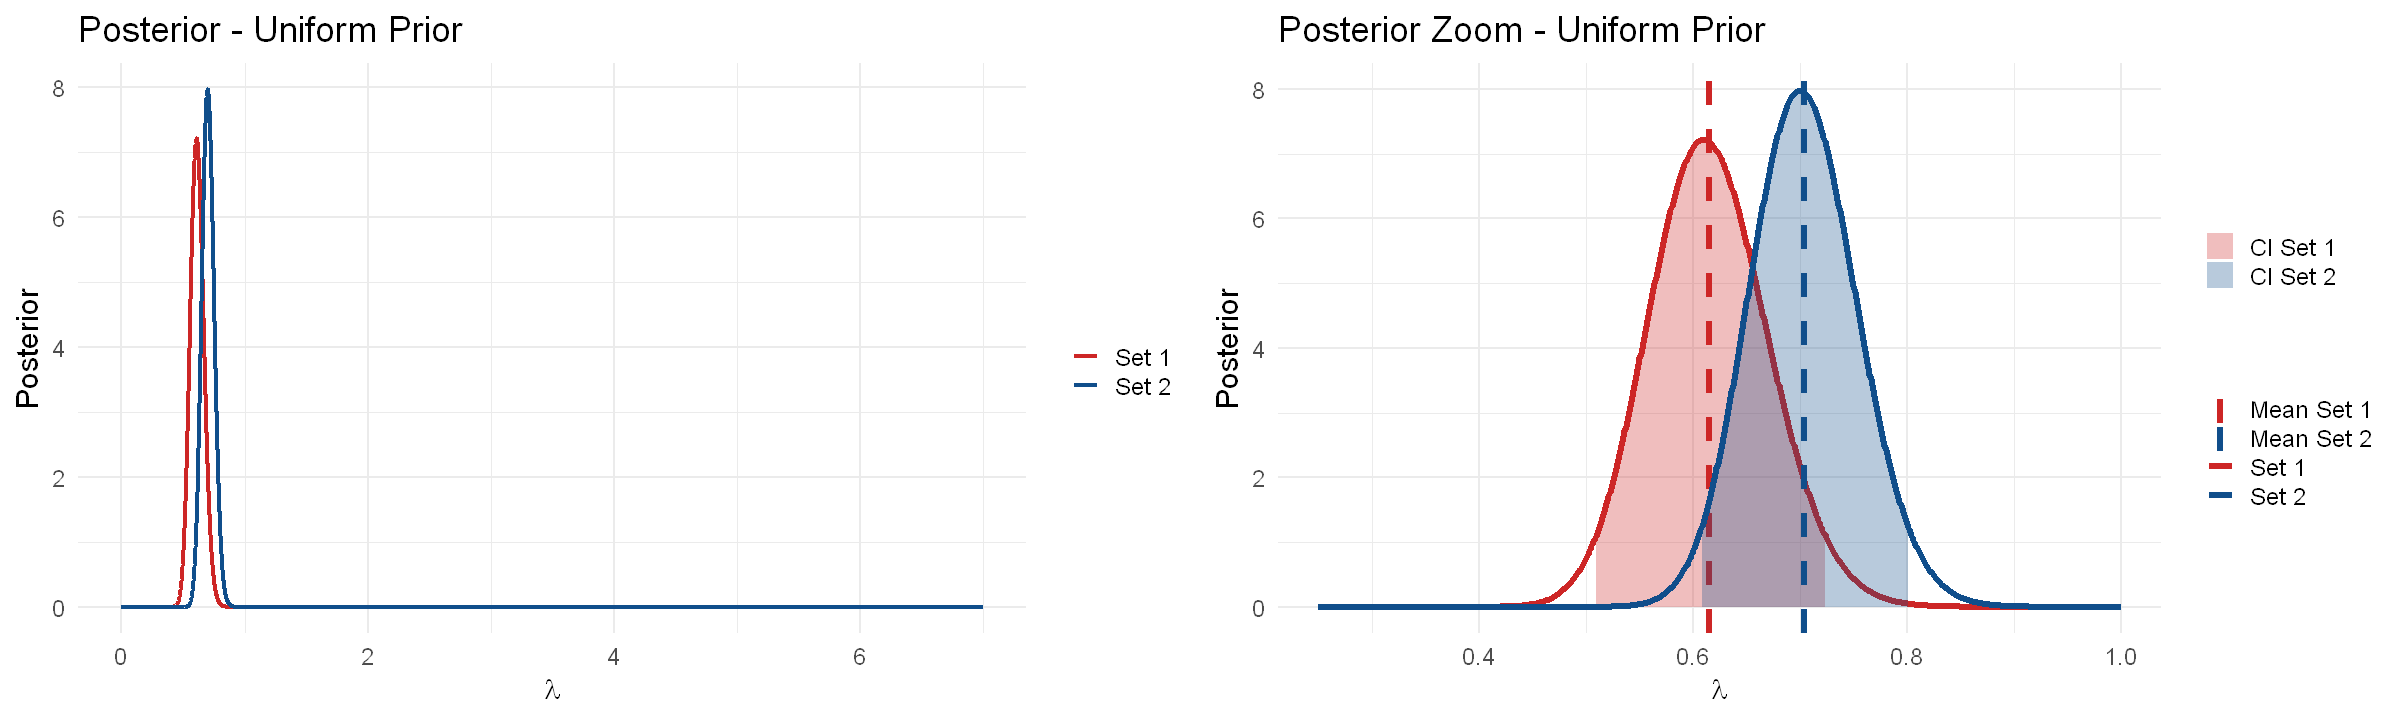

In [34]:
options(repr.plot.width = 20, repr.plot.height = 6)
# plot
unif.post.plot <- ggplot() +
        geom_line(aes(lambda_list, p.post_unif1, color='Set 1'), lwd=1.3) +
        geom_line(aes(lambda_list, p.post_unif2, color='Set 2'), lwd=1.3) +
        labs(x=(TeX(r'(\lambda)')), y ='Posterior', title='Posterior - Uniform Prior', color='') +
        theme_minimal(base_size=18) + 
        scale_color_manual(values = c('Set 1' = 'firebrick3', 'Set 2' = 'dodgerblue4'))

# zoom in plot
unif.post.plot.zoom <- ggplot() +
        geom_line(aes(lambda_list, p.post_unif1, color='Set 1'), lwd=1.7) + 
        geom_area(aes(x = lambda_list[lambda_list > lower_unif1 & lambda_list < upper_unif1], 
                      y = p.post_unif1[lambda_list > lower_unif1 & lambda_list < upper_unif1],
                      fill='CI Set 1'), alpha=0.3) +
        geom_vline(aes(xintercept=mean_unif1, color='Mean Set 1'), linetype='dashed', lwd=1.7) +

        geom_line(aes(lambda_list, p.post_unif2, color='Set 2'), lwd=1.7) + 
        geom_area(aes(x = lambda_list[lambda_list > lower_unif2 & lambda_list < upper_unif2], 
                      y = p.post_unif2[lambda_list > lower_unif2 & lambda_list < upper_unif2],
                      fill='CI Set 2'), alpha=0.3) +
        geom_vline(aes(xintercept=mean_unif2, color='Mean Set 2'), linetype='dashed', lwd=1.7) + 

        labs(x=(TeX(r'(\lambda)')), y ='Posterior', title='Posterior Zoom - Uniform Prior', color='', fill='') + 

        scale_color_manual(values = c('Set 1' = 'firebrick3', 'Mean Set 1' = 'firebrick3', 
                                      'Set 2' = 'dodgerblue4', 'Mean Set 2' = 'dodgerblue4')) +
        scale_fill_manual(values = c('CI Set 1' = 'firebrick3', 'CI Set 2' = 'dodgerblue4')) +
        theme_minimal(base_size = 18) +  

        ylim(0, 8) + xlim(0.25, 1)

grid.arrange(grobs=list(unif.post.plot, unif.post.plot.zoom), nrow=1, ncol=2)

**1.2)**

In [48]:
#posterior with Jeffrey prior
lambda_list <- seq(from=0.0001, to=10, by=delta.t)
p1_like <- poisson(n1,  lambda_list)
p2_like <- poisson(n2,  lambda_list)


p.post_star_Jeffrey1 <- p1_like * (1/sqrt(lambda_list))
p.post_Jeffrey1 <- p.post_star_Jeffrey1 / (sum(p.post_star_Jeffrey1)*delta.t)

mean_Jeffrey1 <- sum(p.post_Jeffrey1 * lambda_list)*delta.t
median_Jeffrey1 <- my.median(lambda_list, p.post_Jeffrey1)
variance_Jeffrey1 <- sum(((mean_Jeffrey1-lambda_list)^2)*p.post_Jeffrey1)*delta.t

lower_Jeffrey1 <- ncredint(lambda_list, p.post_Jeffrey1, level = 0.95)[['lower']]
upper_Jeffrey1 <- ncredint(lambda_list, p.post_Jeffrey1, level = 0.95)[['upper']]


p.post_star_Jeffrey2 <- p2_like * (1/sqrt(lambda_list)) 
p.post_Jeffrey2 <- p.post_star_Jeffrey2 / (sum(p.post_star_Jeffrey2)*delta.t)

mean_Jeffrey2 <- sum(p.post_Jeffrey2 * lambda_list)*delta.t
median_Jeffrey2 <- my.median(lambda_list, p.post_Jeffrey2)
variance_Jeffrey2 <- sum(((mean_Jeffrey2-lambda_list)^2)*p.post_Jeffrey2)*delta.t

lower_Jeffrey2 <- ncredint(lambda_list, p.post_Jeffrey2, level = 0.95)[['lower']]
upper_Jeffrey2 <- ncredint(lambda_list, p.post_Jeffrey2, level = 0.95)[['upper']]


result_jeff <- data.frame(
                mean = c(mean_Jeffrey1, mean_Jeffrey2), 
                median = c(median_Jeffrey1, median_Jeffrey2),
                variance = c(variance_Jeffrey1, variance_Jeffrey2),
                l.ci = c(lower_Jeffrey1, lower_Jeffrey2),
                u.ci = c(upper_Jeffrey1, upper_Jeffrey2),
                row.names = c('1st set', '2nd set')
                )

In [49]:
print(sprintf('Mean value Set 1: %.3f  -  Mean value Set 2: %.3f', result_jeff$mean[1], result_jeff$mean[2]))
print(sprintf('Median value Set 1: %.3f  -  Median value Set 2: %.3f', result_jeff$median[1], result_jeff$median[2]))
cat('\n')
print(sprintf('Variance Set 1: %.4f  -  Variance Set 2: %.4f', result_jeff$variance[1], result_jeff$variance[2]))
cat('\n')
print(sprintf('0.95 CI Set 1 [%.3f - %.3f]', result_jeff$l.ci[1], result_jeff$u.ci[1]))
print(sprintf('0.95 CI Set 2 [%.3f - %.3f]', result_jeff$l.ci[2], result_jeff$u.ci[2]))

[1] "Mean value Set 1: 0.612  -  Mean value Set 2: 0.702"
[1] "Median value Set 1: 0.611  -  Median value Set 2: 0.700"

[1] "Variance Set 1: 0.0031  -  Variance Set 2: 0.0025"

[1] "0.95 CI Set 1 [0.506 - 0.721]"
[1] "0.95 CI Set 2 [0.605 - 0.800]"


Warning message:
"Removed 9250 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 9250 rows containing missing values or values outside the scale range (`geom_line()`)."


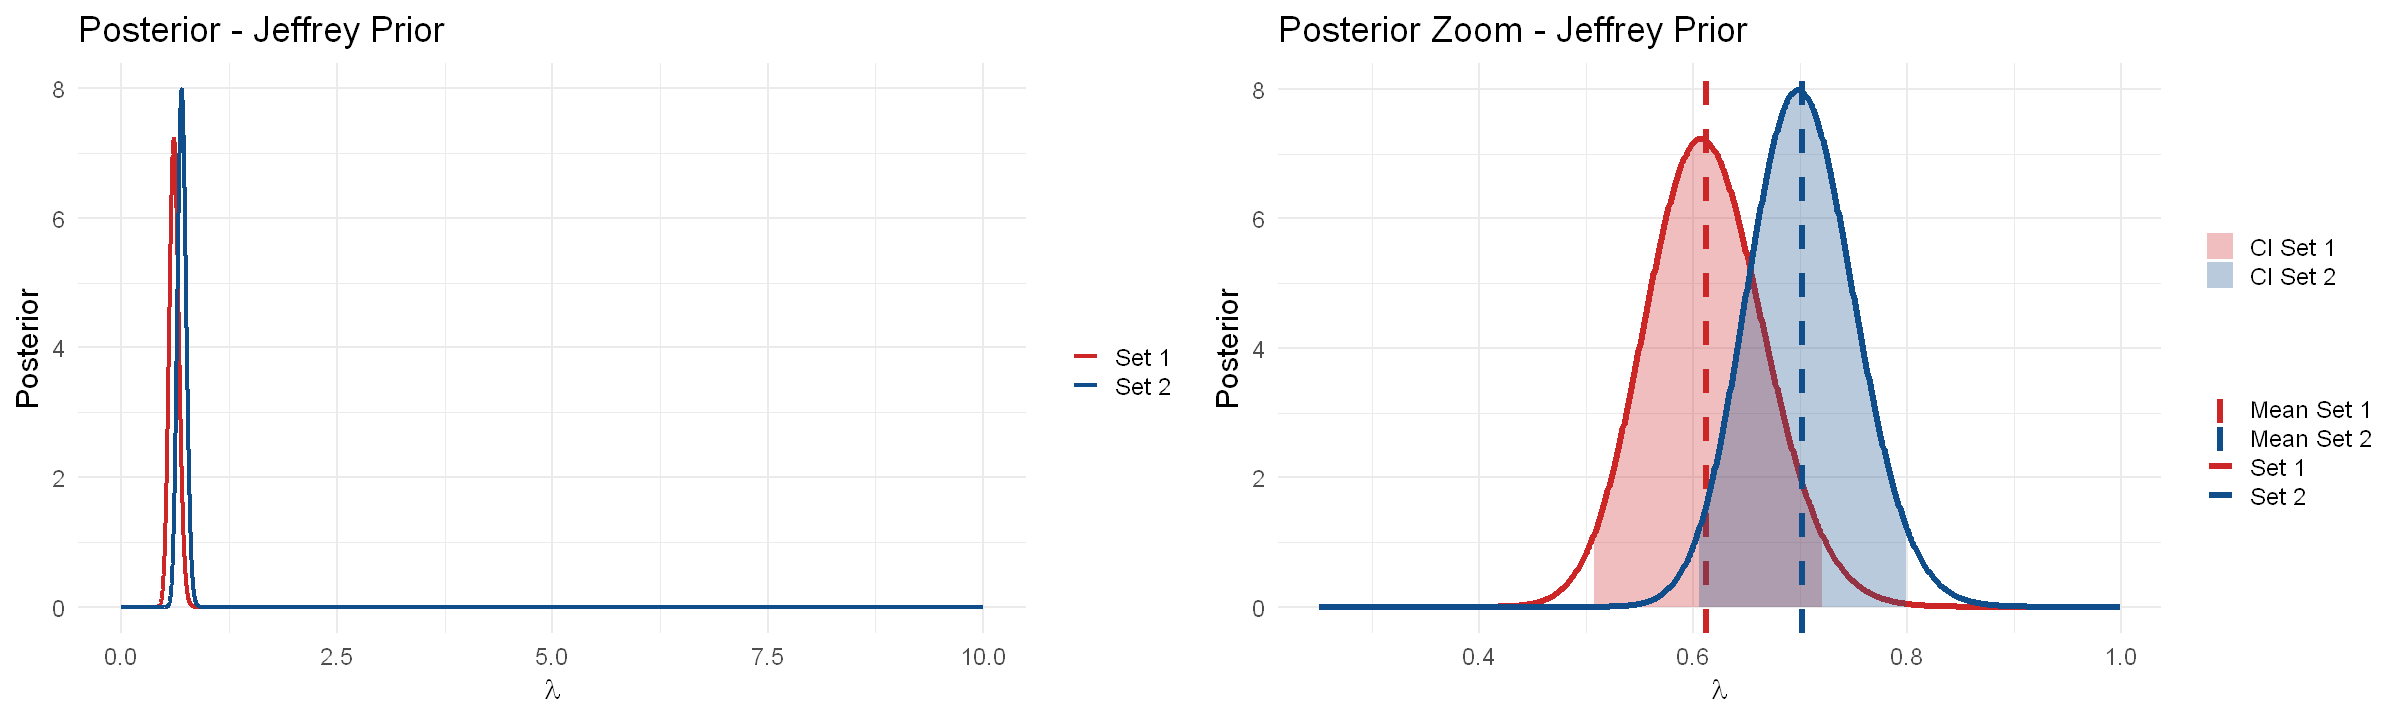

In [50]:
options(repr.plot.width = 20, repr.plot.height = 6)
# plot
jeff.post.plot <- ggplot() +
        geom_line(aes(lambda_list, p.post_Jeffrey1, color='Set 1'), lwd=1.3) +
        geom_line(aes(lambda_list, p.post_Jeffrey2, color='Set 2'), lwd=1.3) +
        labs(x=(TeX(r'(\lambda)')), y ='Posterior', title='Posterior - Jeffrey Prior', color='') +
        theme_minimal(base_size=18) + 
        scale_color_manual(values = c('Set 1' = 'firebrick3', 'Set 2' = 'dodgerblue4'))

# zoom in plot
jeff.post.plot.zoom <- ggplot() +
        geom_line(aes(lambda_list, p.post_Jeffrey1, color='Set 1'), lwd=1.7) + 
        geom_area(aes(x = lambda_list[lambda_list > lower_Jeffrey1 & lambda_list < upper_Jeffrey1], 
                      y = p.post_unif1[lambda_list > lower_Jeffrey1 & lambda_list < upper_Jeffrey1],
                      fill='CI Set 1'), alpha=0.3) +
        geom_vline(aes(xintercept=mean_Jeffrey1, color='Mean Set 1'), linetype='dashed', lwd=1.7) +

        geom_line(aes(lambda_list, p.post_Jeffrey2, color='Set 2'), lwd=1.7) + 
        geom_area(aes(x = lambda_list[lambda_list > lower_Jeffrey2 & lambda_list < upper_Jeffrey2], 
                      y = p.post_unif2[lambda_list > lower_Jeffrey2 & lambda_list < upper_Jeffrey2],
                      fill='CI Set 2'), alpha=0.3) +
        geom_vline(aes(xintercept=mean_Jeffrey2, color='Mean Set 2'), linetype='dashed', lwd=1.7) + 

        labs(x=(TeX(r'(\lambda)')), y ='Posterior', title='Posterior Zoom - Jeffrey Prior', color='', fill='') + 

        scale_color_manual(values = c('Set 1' = 'firebrick3', 'Mean Set 1' = 'firebrick3', 
                                      'Set 2' = 'dodgerblue4', 'Mean Set 2' = 'dodgerblue4')) +
        scale_fill_manual(values = c('CI Set 1' = 'firebrick3', 'CI Set 2' = 'dodgerblue4')) +
        theme_minimal(base_size = 18) +  

        ylim(0, 8) + xlim(0.25, 1)

grid.arrange(grobs=list(jeff.post.plot, jeff.post.plot.zoom), nrow=1, ncol=2)

#### 2)